# AE 598 RL Homework 1

In [1]:
# general packages
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. A grid-world
Implement what appears as Example 3.5 (Gridworld) from Sutton and Barto (Second Edition, Online Draft): http://incompleteideas.net/book/the-book-2nd.html

In [2]:
import gym_gridworld
gw_env = gym.make('GridWorld-v0')

Here we run 20 simulation episodes each consisting of 100 time steps where the agent randomly selects its action. The total reward from each episode is displayed as well as the distrbution of action selection.

Total reward earned for episode 1: 13


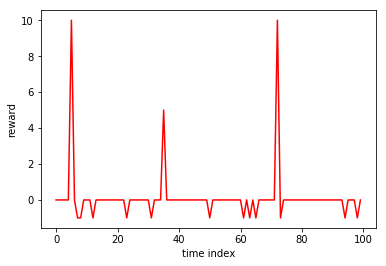

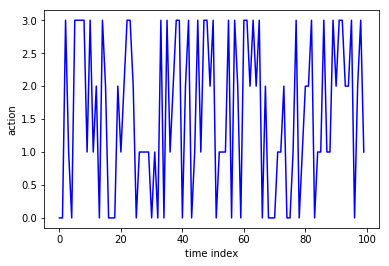

North was selected 25 times
East was selected 24 times
South was selected 19 times
West was selected 32 times


In [3]:
episodes_num = 1
max_time = 100
all_actions = np.array(0)
all_rewards = np.array(0)
for episode in range(episodes_num):
    observation = gw_env.reset()
    episode_total_reward = 0
    for t in range(max_time):
        gw_env.render()
        action = gw_env.action_space.sample()
        all_actions = np.append(all_actions, action)
        observation, reward, done, info = gw_env.step(action)
        all_rewards = np.append(all_rewards, reward)
        episode_total_reward += reward
        if t == max_time - 1:
            print("Total reward earned for episode {0}: {1}".format(episode + 1, episode_total_reward))
            all_rewards = all_rewards[0:-1]
            plt.plot(range(max_time), all_rewards, 'r')
            plt.ylabel('reward')
            plt.xlabel('time index')
            plt.show()
gw_env.close()

# Remove initializing "action"
all_actions = all_actions[0:-1]
plt.plot(range(max_time), all_actions, 'b')
plt.ylabel('action')
plt.xlabel('time index')
plt.show()

n, bins = np.histogram(all_actions, bins=[0, 1, 2, 3, 4])
print("North was selected {} times".format(n[0]))
print("East was selected {} times".format(n[1]))
print("South was selected {} times".format(n[2]))
print("West was selected {} times".format(n[3]))


## 2. A classical control system
Implement your own version of the "acrobot."

A description of this system with equations of motion can be found in Chapter 3 of Tedrake, Underactuated Robotics (Online Draft): http://underactuated.mit.edu/underactuated.html

The version implemented here is adapted from the standard Acrobot environment in OpenAI Gym. See MyAcrobotEnv class for details.

In [4]:
import my_acrobot
ab_env = gym.make('MyAcrobot-v0')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


Run the same simulation as 1.

Total reward earned for episode 1: 0


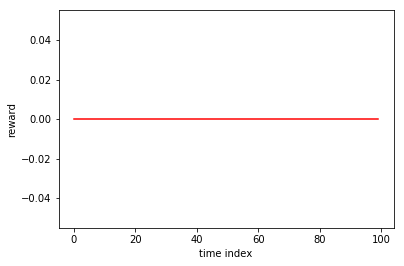

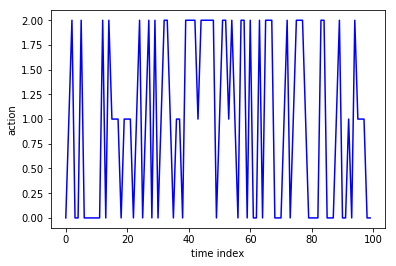

Negative torque was selected 39 times
0 torque was selected 25 times
Positive torque was selected 36 times


In [5]:
episodes_num = 1
max_time = 100
all_actions = np.array(0)
all_rewards = np.array(0)
for episode in range(episodes_num):
    observation = ab_env.reset()
    episode_total_reward = 0
    for t in range(max_time):
        ab_env.render()
        action = ab_env.action_space.sample()
        all_actions = np.append(all_actions, action)
        observation, reward, done, info = ab_env.step(action)
        all_rewards = np.append(all_rewards, reward)
        episode_total_reward += reward
        if t == max_time - 1:
            print("Total reward earned for episode {0}: {1}".format(episode + 1, episode_total_reward))
            all_rewards = all_rewards[0:-1]
            plt.plot(range(max_time), all_rewards, 'r')
            plt.ylabel('reward')
            plt.xlabel('time index')
            plt.show()
ab_env.close()

# Remove initializing "action"
all_actions = all_actions[0:-1]
plt.plot(range(max_time), all_actions, 'b')
plt.ylabel('action')
plt.xlabel('time index')
plt.show()

n, bins = np.histogram(all_actions, bins=[0, 1, 2, 3])
print("Negative torque was selected {} times".format(n[0]))
print("0 torque was selected {} times".format(n[1]))
print("Positive torque was selected {} times".format(n[2]))

## 3. System of my choice - Blackjack
This environment is an adaptation of the Simple blackjack environment included in the standard OpenAi Gym repository.
Their environment corresponds to the version of the blackjack problem in described in section 5.1 of Sutton and 
Barto.

SEE: https://github.com/openai/gym/blob/master/gym/envs/toy_text/blackjack.py
     http://incompleteideas.net/book/the-book-2nd.html
     
Changes have been made to better reflect the modern game and allow for scaling to a larger action space and the 
introduction of additional players. Eventually.

**In the one-on-one game:**
- The agent is the player and is dealt both cards face up
- The dealer is dealt one card face up and one face down
- The player can choose to stay or hit
- Once the player chooses to stay, the hand will be concluded by the dealer playing themselves according to standard
    rules, i.e. hit below or at 16, stay at 17, etc.
- Reward is then distributed and the hand is over

*Given this formulation:*

The observation space is a 3-tuple of: the sum of the player's hand, the dealer's showing card, and whether
the player holds an ace.

The action space is a discrete space of 2.

**Rewards** are:
- a win is +5
- a loss is -5
- a draw is +1

With rewards structured this way they are no longer directly proportional to monetary gain/loss. This is to allow the environment to scale to more complex simulations of the game and pay respect to the old table adage "a push is a win."

*Currently, the deck is infinite with replacement.* 

In [6]:
import my_blackjack
bj_env = gym.make('MyBlackjack-v0')

Run a simulation of an agent that randomly selects to hit or stay playing 100 hands.

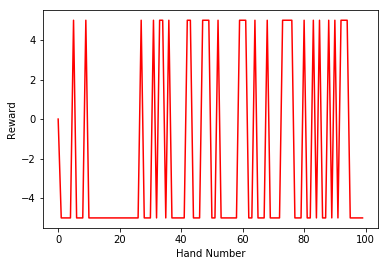

Total reward earned: -200


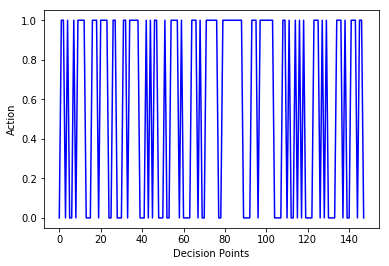

Player stayed 64 times
Player hit 84 times


In [7]:
max_num_hands = 100
episode_total_reward = 0
all_actions = np.array(0)
all_rewards = np.array(0)
for hand in range(max_num_hands):
    observation = bj_env.reset()
    done = False
    while not done:
        action = bj_env.action_space.sample()
        all_actions = np.append(all_actions, action)
        observation, reward, done, info = bj_env.step(action)
        
    all_rewards = np.append(all_rewards, reward)
    episode_total_reward += reward

all_rewards = all_rewards[0:-1]
plt.plot(range(max_num_hands), all_rewards, 'r')
plt.ylabel('Reward')
plt.xlabel('Hand Number')
plt.show()
print("Total reward earned: {}".format(episode_total_reward))
            
            
# Remove initializing "action"
all_actions = all_actions[0:-1]
plt.plot(range(all_actions.size), all_actions, 'b')
plt.ylabel('Action')
plt.xlabel('Decision Points')
plt.show()

n, bins = np.histogram(all_actions, bins=[0, 1, 2])
print("Player stayed {} times".format(n[0]))
print("Player hit {} times".format(n[1]))